BloomTech Data Science

*Unit 2, Sprint 1, Module 3*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
#Import Block
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from category_encoders import OneHotEncoder


# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols, parse_dates=True, index_col='SALE DATE', infer_datetime_format=True)
    df = df.dropna()
    df['BOROUGH'] = df['BOROUGH'].astype(str)
    #regex: replace '$' ',' and whitespace
    df['SALE PRICE'] = df['SALE PRICE'].replace(to_replace="[\$\,\ ]", value="", regex=True).astype(int)
    #df = df.loc[df['SALE PRICE'] > 0] #drop rows with zero sale data

    #slice dataset
    df = df.loc[df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
    df = df.loc[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 2000000)]

    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)

**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [ ]:
# Perform your exploratory data analysis here and
# modify the wrangle function above
df.head()
#df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3164 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  3164 non-null   object 
 1   NEIGHBORHOOD             3164 non-null   object 
 2   BUILDING CLASS CATEGORY  3164 non-null   object 
 3   GROSS SQUARE FEET        3164 non-null   float64
 4   YEAR BUILT               3164 non-null   float64
 5   SALE PRICE               3164 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 173.0+ KB


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [ ]:
X = df.drop('SALE PRICE', axis=1)
y = df['SALE PRICE']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [ ]:
datemask = (df.index < pd.Timestamp("2019-04"))
X_train, y_train = X.loc[datemask], y.loc[datemask]
X_test, y_test = X.loc[~datemask], y.loc[~datemask]
#X_test.head()

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [ ]:
# Using dummy regessor method for baseline model
baseline = DummyRegressor(strategy='mean').fit(X_train, y_train)
baseline_mae = mean_absolute_error(y_train, baseline.predict(X_train))
print('Baseline MAE:', baseline_mae)

Baseline MAE: 216497.12357684076


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [ ]:
ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)
#XT_test.head()

**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
model_lr = LinearRegression().fit(XT_train, y_train)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
model_r = Ridge().fit(XT_train, y_train)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [ ]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 131242.25387365912
Linear Test MAE: 7294092761315.756


**Task 10:** Check the training and test metrics for `model_r`.

In [ ]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 127630.56507787386
Ridge Test MAE: 141206.1668531332


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [ ]:
# Calculate R^2 score
# (can also use model_r.score as default == r2)
training_r2_r = r2_score(y_train, model_r.predict(XT_train))
test_r2_r = r2_score(y_test, model_r.predict(XT_test))
print('Ridge Training R2:', training_r2_r)
print('Ridge Test R2:', test_r2_r)

Ridge Training R2: 0.6154355712168953
Ridge Test R2: 0.4801135314484869


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

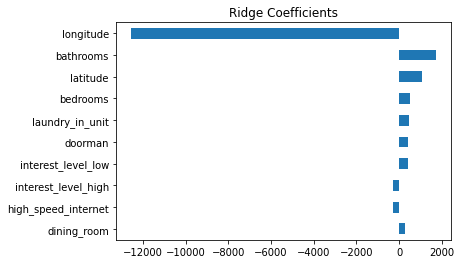

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

Text(0.5, 1.0, 'Ridge Coefficients')

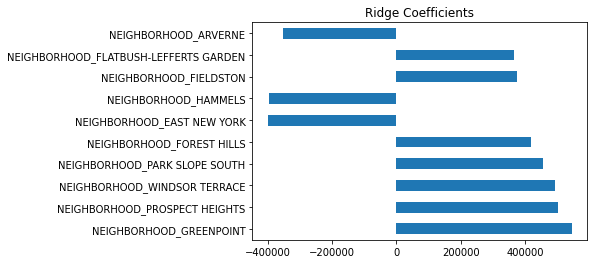

In [ ]:
feat_names = ohe.get_feature_names()
feat_imp = pd.Series(model_r.coef_, index=feat_names).sort_values(key=abs, ascending=False)

feat_imp.head(10).plot(kind='barh')
plt.title("Ridge Coefficients")